Team Id: PNT2022TMID29438

Project Name: AI-Powered Nutrition Analyzer For Fitness Enthusiasts

# **Model Building**



In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing The Model Building Libraries**

In [1]:
import numpy as np
import tensorflow 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout 
from keras.preprocessing.image import ImageDataGenerator

Image Data Agumentation

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

Loading our data and performing data agumentation

In [17]:
x_train = train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Colab Notebooks/Dataset/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

x_test = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Colab Notebooks/Dataset/TEST_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse') 

Found 4138 images belonging to 5 classes.
Found 929 images belonging to 3 classes.


**Initializing The Model**

In [2]:
model = Sequential()

**Adding CNN Layers**

In [3]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

**Adding Dense Layers**

In [4]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [5]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

**Configure The Learning Process**

In [8]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

**Train The Model**

In [18]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=10, validation_data=x_test,validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
828/828 [==============================] - 897s 1s/step - loss: 0.6253 - accuracy: 0.7559 - val_loss: 0.5483 - val_accuracy: 0.7922
Epoch 2/10
828/828 [==============================] - 32s 38ms/step - loss: 0.4281 - accuracy: 0.8391 - val_loss: 0.4750 - val_accuracy: 0.8256
Epoch 3/10
828/828 [==============================] - 35s 42ms/step - loss: 0.3963 - accuracy: 0.8473 - val_loss: 0.4856 - val_accuracy: 0.8149
Epoch 4/10
828/828 [==============================] - 33s 39ms/step - loss: 0.3550 - accuracy: 0.8695 - val_loss: 0.4088 - val_accuracy: 0.8493
Epoch 5/10
828/828 [==============================] - 34s 41ms/step - loss: 0.3385 - accuracy: 0.8722 - val_loss: 0.4086 - val_accuracy: 0.8385
Epoch 6/10
828/828 [==============================] - 33s 40ms/step - loss: 0.3211 - accuracy: 0.8826 - val_loss: 0.4009 - val_accuracy: 0.8471
Epoch 7/10
828/828 [==============================] - 32s 39ms/step - loss: 0.3074 - accuracy: 0.8809 - val_loss: 0.3954 - val_accuracy: 

**Save The Model**

In [19]:
classifier.save('nutrition.h5')

**Test The Model**

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

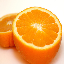

In [21]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/Dataset/TRAIN_SET/ORANGE/n07749192_5963.jpg",target_size= (64,64))
img

In [24]:
x=image.img_to_array(img)

In [25]:
x

array([[[251., 239., 225.],
        [254., 240., 227.],
        [254., 242., 228.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 251.]],

       [[252., 240., 226.],
        [252., 240., 226.],
        [255., 243., 229.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 251.]],

       [[254., 242., 228.],
        [254., 242., 228.],
        [253., 243., 231.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 253.]],

       ...,

       [[250., 223., 204.],
        [252., 225., 204.],
        [254., 227., 208.],
        ...,
        [242., 223., 216.],
        [243., 226., 218.],
        [243., 226., 218.]],

       [[249., 227., 206.],
        [250., 225., 205.],
        [251., 229., 208.],
        ...,
        [243., 226., 218.],
        [243., 226., 219.],
        [245., 228., 220.]],

       [[248., 225., 207.],
        [251., 228., 210.],
        [251., 2

In [26]:
x.ndim

3

In [27]:
x=np.expand_dims(x,axis=0)

In [28]:
x.ndim

4

In [29]:
pred = classifier.predict(x)

1/1 [==============================] - 0s 109ms/step


In [30]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [31]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'ORANGE'